## Import required packages ##

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data ##

In [41]:
visa_dataset="/Users/srilakshmidurgachunduri/Documents/NareshIT/Data Science/EDA/Data Files/Visadataset.csv"
visa_df=pd.read_csv(visa_dataset)
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [42]:
p_wage=visa_df['prevailing_wage']
p_wage.count()

25480

In [18]:
wage_count=round(p_wage.count(),2)
wage_mean=round(p_wage.mean(),2)
wage_median=round(p_wage.median(),2)
wage_max=round(p_wage.max(),2)
wage_min=round(p_wage.min(),2)

wage_list=[wage_count,wage_mean,wage_median,wage_max,wage_min]
pd.DataFrame(wage_list,columns=["prevailing_wage"],index=["wage_count","wage_mean","wage_median","wage_max","wage_min"])

,prevailing_wage
wage_count,25480.00
wage_mean,74455.81
wage_median,70308.21
wage_max,319210.27
wage_min,2.14


In [13]:
num_cols=visa_df.select_dtypes(exclude='object').columns
dict1={}
for i in num_cols:
    count=visa_df[i].count()
    mean=round(p_wage.mean(),2)
    median=round(p_wage.median(),2)
    maxx=round(p_wage.max(),2)
    minn=round(p_wage.min(),2)
    std=round(p_wage.std(),2)
    p25=round(np.percentile(p_wage,25),2)
    p50=round(np.percentile(p_wage,50),2)
    p75=round(np.percentile(p_wage,75),2)
    list1=[count,maxx,minn,mean,median,std,p25,p50,p75]
    dict1[i]=list1
index_list=["count","maxx","minn","mean","median","std","25p","50p","75p"]
number_df=pd.DataFrame(dict1,index=index_list)
number_df.to_csv("/Users/srilakshmidurgachunduri/Documents/NareshIT/Data Science/EDA/Data Files/numerical_columns_df.csv") 
number_df

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.00,25480.00,25480.00
maxx,319210.27,319210.27,319210.27
minn,2.14,2.14,2.14
mean,74455.81,74455.81,74455.81
median,70308.21,70308.21,70308.21
std,52815.94,52815.94,52815.94
25p,34015.48,34015.48,34015.48
50p,70308.21,70308.21,70308.21
75p,107735.51,107735.51,107735.51


In [6]:
p_wage=visa_df['prevailing_wage']
print(np.mean(p_wage))
print(np.median(p_wage))
print(np.max(p_wage))
print(np.min(p_wage))
print(np.std(p_wage))
print(np.percentile(p_wage,25),2)

74455.81459209183
70308.20999999999
319210.27
2.1367
52814.90589711402
34015.479999999996 2


** percentile and Quantile **

- percentile 25p 

- Quantile 0.25p

In [7]:
np.percentile(p_wage,25)

34015.479999999996

In [8]:
np.percentile(p_wage,50)


70308.20999999999

In [9]:
np.percentile(p_wage,75)

107735.51250000001

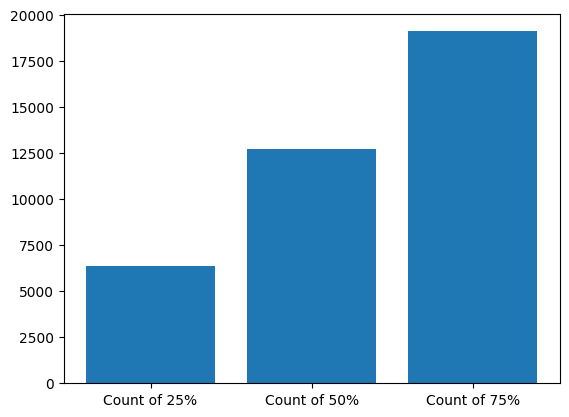

In [16]:
p_wage=visa_df['prevailing_wage']
count_25p=len(p_wage[p_wage<np.percentile(p_wage,25)])
count_50p=len(p_wage[p_wage<np.percentile(p_wage,50)])
count_75p=len(p_wage[p_wage<np.percentile(p_wage,75)])

l1=["Count of 25%","Count of 50%","Count of 75%"]
l2=[count_25p,count_50p,count_75p]
d1=pd.DataFrame(zip(l1,l2),columns=["Till_%","Count"])
plt.bar("Till_%","Count",data=d1)
plt.show()

In [ ]:
Extract data frame for people who have wages less than 34015(25p)

Step1:  Take the refernce column 

Step2: Apply the condition it will provide true or false

Step3: Apply the original data frame on the top of that so that it will give only true values

    

In [17]:
p_wage=visa_df['prevailing_wage']
p_25=np.percentile(p_wage,25)
con=p_wage<p_25
visa_df[con]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
12,EZYV13,Asia,Bachelor's,Y,N,123876,1963,Northeast,28663.0500,Year,Y,Certified
16,EZYV17,Europe,Master's,Y,N,76638,1991,Midwest,3706.7900,Year,Y,Certified
17,EZYV18,Asia,Master's,Y,N,2747,2001,West,16132.6100,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25461,EZYV25462,Asia,Master's,Y,N,2861,2004,West,54.9196,Hour,Y,Denied
25465,EZYV25466,North America,High School,N,N,2577,1995,South,481.2238,Hour,Y,Certified
25466,EZYV25467,Europe,Bachelor's,Y,N,1938,2005,West,6973.4000,Year,Y,Denied
25470,EZYV25471,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified


In [18]:
p_wage=visa_df['prevailing_wage']
p_50=np.percentile(p_wage,50)
con=p_wage<p_50
visa_df[con]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified
12,EZYV13,Asia,Bachelor's,Y,N,123876,1963,Northeast,28663.0500,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25465,EZYV25466,North America,High School,N,N,2577,1995,South,481.2238,Hour,Y,Certified
25466,EZYV25467,Europe,Bachelor's,Y,N,1938,2005,West,6973.4000,Year,Y,Denied
25470,EZYV25471,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.5600,Year,Y,Certified


In [20]:
#Between 25p and 50p
#i.e more than 25p and less than 50p
p_wage=visa_df['prevailing_wage']
p_25=np.percentile(p_wage,25)
p_50=np.percentile(p_wage,50)
con1=p_wage>p_25
con2=p_wage<p_50
visa_df[con1&con2]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.76,Year,Y,Certified
22,EZYV23,Asia,Master's,Y,N,2878,1968,West,45642.39,Year,Y,Certified
28,EZYV29,Asia,Master's,Y,N,18,2004,Northeast,40925.86,Year,Y,Certified
38,EZYV39,Asia,Bachelor's,Y,Y,2206,1909,Northeast,50960.01,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25449,EZYV25450,Asia,Bachelor's,Y,N,3017,2000,West,39313.00,Year,Y,Certified
25454,EZYV25455,Asia,Bachelor's,N,N,1316,2007,South,62844.97,Year,Y,Denied
25456,EZYV25457,Asia,Bachelor's,Y,N,998,1996,South,67340.65,Year,Y,Certified
25459,EZYV25460,Asia,High School,Y,N,4727,1990,Midwest,53952.84,Year,Y,Denied


In [22]:
#Less than 25 and More than 75

p_wage=visa_df['prevailing_wage']
p_25=np.percentile(p_wage,25)
p_75=np.percentile(p_wage,75)
con1=p_wage<p_25
con2=p_wage>p_75
visa_df[con1|con2]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
12,EZYV13,Asia,Bachelor's,Y,N,123876,1963,Northeast,28663.0500,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.4700,Year,N,Certified
25470,EZYV25471,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.5600,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified


## Histogram ##

- From raw data will make class intervals
- Will count the observations in each class intervals
- Freqiency distribution table
- Plot of Frequency distribution table is Hitogram


(array([2992.,  871., 1005., 1170., 1242., 1434., 1385., 1443., 1444.,
        1445., 1457., 1335., 1268., 1217., 1088.,  978.,  807.,  645.,
         509.,  373.,  264.,  144.,  105.,  111.,  107.,   99.,   88.,
          79.,   65.,   64.,   58.,   53.,   33.,   33.,   29.,   19.,
           7.,    3.,    6.,    5.]),
 array([2.13670000e+00, 7.98234003e+03, 1.59625434e+04, 2.39427467e+04,
        3.19229500e+04, 3.99031534e+04, 4.78833567e+04, 5.58635600e+04,
        6.38437634e+04, 7.18239667e+04, 7.98041700e+04, 8.77843734e+04,
        9.57645767e+04, 1.03744780e+05, 1.11724983e+05, 1.19705187e+05,
        1.27685390e+05, 1.35665593e+05, 1.43645797e+05, 1.51626000e+05,
        1.59606203e+05, 1.67586407e+05, 1.75566610e+05, 1.83546813e+05,
        1.91527017e+05, 1.99507220e+05, 2.07487423e+05, 2.15467627e+05,
        2.23447830e+05, 2.31428033e+05, 2.39408237e+05, 2.47388440e+05,
        2.55368643e+05, 2.63348847e+05, 2.71329050e+05, 2.79309253e+05,
        2.87289457e+05, 2.9526

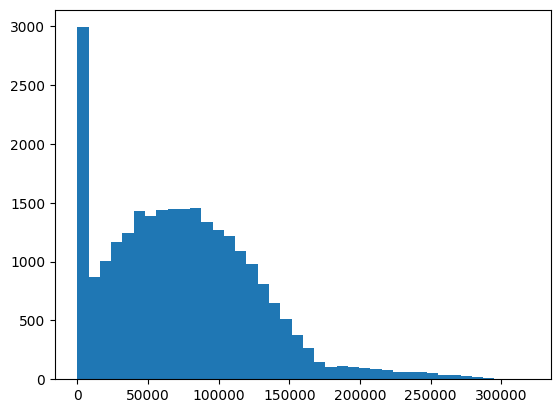

In [47]:
p_wage=visa_df['prevailing_wage']
frequency,interval,n=plt.hist(p_wage,bins=40)

frequency,interval

In [ ]:
p_wage=visa_df['prevailing_wage']
frequency,interval,n=plt.hist(p_wage)
dict1={}
for i in range of len(p_wage):
    dict1

In [28]:
len(p_wage)

25480

/var/folders/_5/f439c61s71nc6hfdz2f2ndtr0000gn/T/ipykernel_5270/2041553515.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(visa_df['prevailing_wage'])


<Axes: xlabel='prevailing_wage', ylabel='Density'>

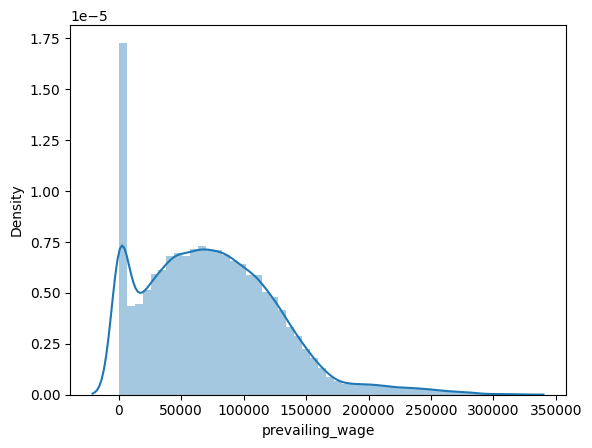

In [32]:
sns.distplot(visa_df['prevailing_wage'])

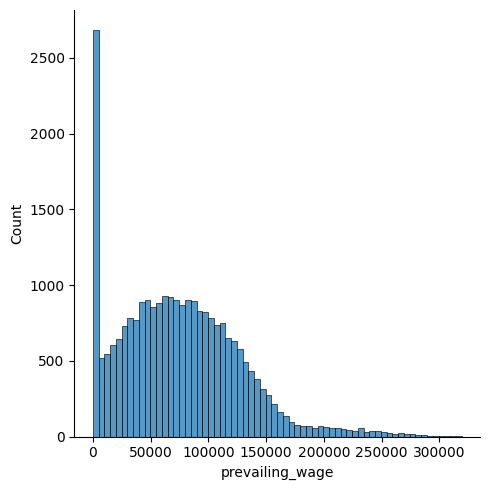

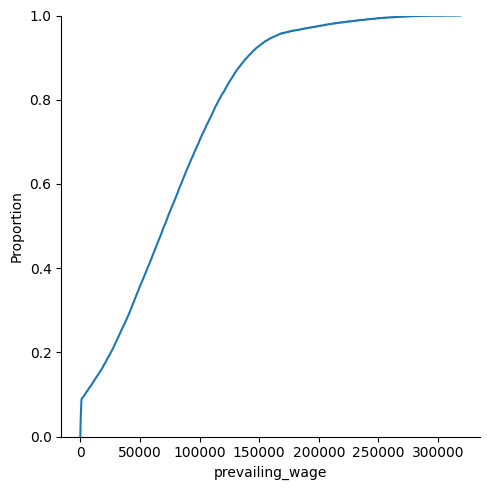

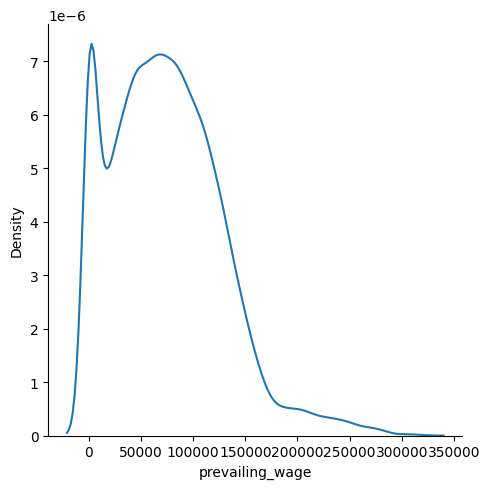

In [38]:
sns.displot(visa_df['prevailing_wage'])
sns.displot(visa_df['prevailing_wage'],kind="ecdf") # Cumilative distribution plot
sns.displot(visa_df['prevailing_wage'],kind='kde') # Kernal density estimation plot

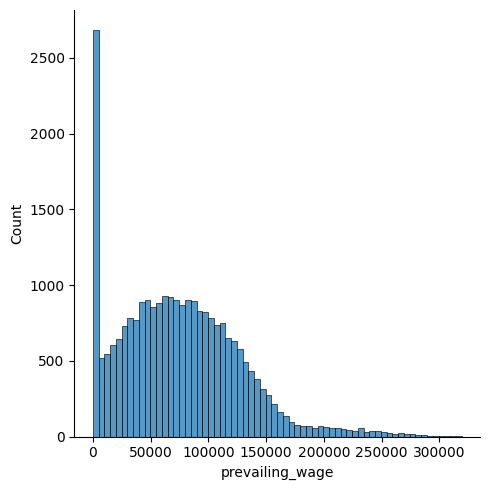

In [35]:
sns.displot(visa_df['prevailing_wage'])

plt.subplot(1,3,1)
plt.subplot(1,3,2)
plt.subplot(1,3,3)

1,3, referes to 1 row and three columns and 1 , 2, 3 refers to each.

(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([2.13670000e+00, 3.19229500e+04, 6.38437634e+04, 9.57645767e+04,
        1.27685390e+05, 1.59606203e+05, 1.91527017e+05, 2.23447830e+05,
        2.55368643e+05, 2.87289457e+05, 3.19210270e+05]),
 <BarContainer object of 10 artists>)

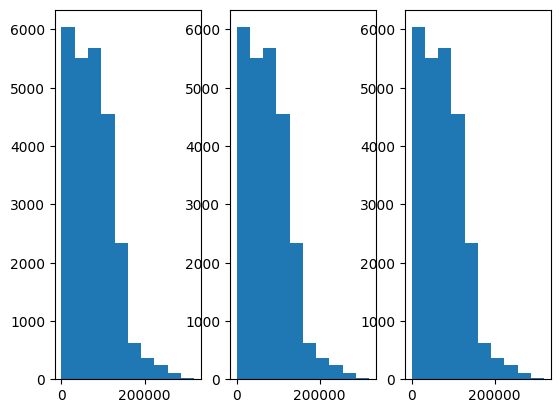

In [48]:
plt.subplot(1,3,1)
plt.hist(visa_df['prevailing_wage'])
plt.subplot(1,3,2)
plt.hist(visa_df['prevailing_wage'])
plt.subplot(1,3,3)
plt.hist(visa_df['prevailing_wage'])